# Microestructuras y Sistemas de Trading
## Laboratorio 1
### Equipo C

<img style="float: right; margin: -100px 80px 30px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200px" height="200px" />

#### <font color="blue">**INTEGRANTES:**</font>

* <font color="black">**INTEGRANTE 1 :**</font> Andres García Ruvalcaba
* <font color="black">**INTEGRANTE 2 :**</font> Mariana López Correa,
* <font color="black">**INTEGRANTE 3 :**</font> Paulina Milenka Glez Manrique 
* <font color="black">**INTEGRANTE 4 :**</font> Juan López Pelayo

<font color="red">**Repositorio :**</font> https://github.com/paulinamilenka/LAB-1

##  <span style="color:blue">**1.1 Objetivos**</span>

#### 1.2.1 Objetivo general.

> Replicar los ETFs conocidos como ishares para el mercado de renta varialbe de USA que la empresa BlackRock ofrece para analizar la construcción de un portafolio de inversión y un criterio de rebalanceo. 

#### 1.2.2 Objetivo específico.

> * Comparar los resultados de haber rebalanceado periódicamente el portafolio o no haberlo hecho y continuar todo un año con     las mismas posiciones del ETF IVW.
> * Realizar el proceso para que pueda replicarse para cualquier ETF del mercado. 

## Introducción 

### <font color = "green" > **¿Qué es un ETF?**:
    
> Un ETF (Exchange Trade Fund)  puede definirse como un fondo que replica un índice, es decir, es un fondo que cotiza en bolsa y   que está compuesto por un grupo de activos diversificados, pues contiene las acciones de todas las empresas de un índice.

## Desarrollo

In [1]:
import quandl 
import pandas as pd
import os
import calendar
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt 
from datetime import datetime

In [2]:
quandl.ApiConfig.api_key = "6ARMqMT_1jbzJ71XyRCx"

In [3]:
path=os.getcwd()
files=os.listdir(path)
etf_files = [f for f in files if f[-3:]=='csv']

In [4]:
df=[]
for f in etf_files: 
    data=pd.read_csv(f, header=0, sep=',', index_col=0, parse_dates=False, skip_blank_lines=True, skiprows=10)

    df.append(data)

In [5]:
df_nassets = []
for f in etf_files:
    data=pd.read_csv(f,nrows=4)
    data=data.iloc[3,0]
    df_nassets.append(data)

In [6]:
nassets = []
for i in range(len(df_nassets)):
    a=df_nassets[i]
    a=a.replace('.00','').replace(',','')
    a=int(a)
    nassets.append(a)

In [7]:
df_fechas=[]
for f in etf_files:
    data=pd.read_csv(f,nrows=4)
    data=data.iloc[1,0]
    df_fechas.append(data)

In [8]:
dic = {'abr':'04','ago':'08','dic':'12','feb':'02','ene':'01','jun':'06','jul':'07','mar':'03','may':'05','nov':'11','oct':'10','sep':'09'}
lenfechas=len(df_fechas)
for i in range(lenfechas):
    df_fechas[i]=df_fechas[i].replace(df_fechas[i][3:6],dic.get(df_fechas[i][3:6]))

In [9]:
l=len(df_fechas)
for i in range(l):
    df_fechas[i]=df_fechas[i][-4:]+df_fechas[i][2:6]+df_fechas[i][0:2]


In [10]:
df_prices = []
for i in range(len(df)-1):
    arch= df[i]
    tickers = arch.index.get_values()
    tickers = tickers.tolist()
    prices = quandl.get_table('WIKI/PRICES',ticker = tickers,  qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                       date = { 'gte': df_fechas[i], 'lte': df_fechas[-1] }, 
                       paginate=True)
    df_prices.append(prices)

C:\Users\milen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


In [11]:
p_prices=df_prices[0].pivot('ticker','date','adj_close')
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices=p_prices.fillna(method='ffill',axis=1)

In [12]:
q_acc=[]
l=len(df)
for i in range(l):
    data=df[i]['Acciones'].dropna()
    data=data.sort_index(ascending=True)
    q_acc.append(data)

In [13]:
acciones=[] #lista con las acciones cinvertida a DataFrame
l=len(q_acc)
for i in range(l):
    data=q_acc[i].to_frame()
    acciones.append(data)


In [14]:
l=len(acciones)
acc_clean = [] #Lista con las acciones limpias 
for i in range(l):
    a=acciones[i]
    a=a['Acciones'].str.replace('.00','').str.replace(',','')
    acc_clean.append(a)
acc_clean[0]=acc_clean[0].astype(int)
acc_clean[1]=acc_clean[1].astype(int)
acc_clean[2]=acc_clean[2].astype(int)
acc_clean[3]=acc_clean[3].astype(int)
acc_clean[4]=acc_clean[4].astype(int)
acc_clean[5]=acc_clean[5].astype(int)
acc_clean[6]=acc_clean[6].astype(int)
acc_clean[7]=acc_clean[7].astype(int)
acc_clean[8]=acc_clean[8].astype(int)
acc_clean[9]=acc_clean[9].astype(int)
acc_clean[10]=acc_clean[10].astype(int)
acc_clean[11]=acc_clean[11].astype(int)




In [15]:
all_data = p_prices.join(acc_clean[0])


In [16]:
fechas=all_data.columns.get_values()
fechas=fechas[0:-1]

C:\Users\milen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [17]:
fechas2=pd.to_datetime(fechas)

In [18]:
precios=all_data.iloc[:,0:-1].transpose()
cantidades=all_data['Acciones']

In [19]:
totales=np.dot(precios,cantidades)
totales=pd.DataFrame(totales,index=fechas)

In [20]:
navs_diarios1=totales/nassets[0]

In [21]:
rendimiento_final1=navs_diarios1.iloc[-1]/navs_diarios1.iloc[0]-1

In [22]:
navs_diarios1=pd.DataFrame(navs_diarios1)

In [23]:
rends_diarios1=((navs_diarios1-navs_diarios1.shift(1))/navs_diarios1.shift(1)).iloc[1:]

In [24]:
desv_diaria1=np.std(rends_diarios1)

In [25]:
rends=[]
for i in range(len(df_fechas)-1):
    rend=rend1=navs_diarios1.transpose()[df_fechas[i+1]]/navs_diarios1.transpose()[df_fechas[i]]-1
    rends.append(rend)
rend1=pd.DataFrame(rends,index=df_fechas[1:])



In [26]:
sharpe1=(rend1-.02)/desv_diaria1

# Escenario 2 

In [27]:
p_prices2=df_prices[1].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices2=p_prices2.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [28]:
all_data2=p_prices2.join(acc_clean[1])

In [29]:
precios2=all_data2.iloc[:,0:-1].transpose()
cantidades2=all_data2['Acciones']


In [30]:
totales2=np.dot(precios2,cantidades2)
totales2=pd.DataFrame(totales2, index= fechas2[(fechas2 >= df_fechas[1]) & (fechas2 <= df_fechas[12])] )

In [31]:
navs_diarios2=totales2/nassets[1]

In [32]:
rendimiento_final2=navs_diarios2.iloc[-1]/navs_diarios2.iloc[0]-1
navs_diarios2=pd.DataFrame(navs_diarios2)

In [33]:
rends2=[]
for i in range(len(df_fechas)-2):
    rend2=rendd=navs_diarios2.transpose()[df_fechas[i+2]]/navs_diarios2.transpose()[df_fechas[i+1]]-1
    rends2.append(rend2)
rends2=pd.DataFrame(rends2,index = df_fechas[2:])



In [34]:
a= rend1.loc[[(df_fechas[1])]]
rend2=a.append(rends2)

In [35]:
navs_diariosb=pd.DataFrame(navs_diarios1, index= fechas2[(fechas2 < df_fechas[1])] )
navs_diarios2=navs_diariosb.append(navs_diarios2)

In [36]:
rends_diarios2=((navs_diarios2-navs_diarios2.shift(1))/navs_diarios2.shift(1)).iloc[1:]
desv_diaria2=np.std(rends_diarios2)

In [37]:
sharpe2=(rend2-.02)/desv_diaria2

# Escenario 3 

In [38]:
p_prices3=df_prices[2].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices3=p_prices3.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [39]:
all_data3=p_prices3.join(acc_clean[2])

In [40]:
precios3=all_data3.iloc[:,0:-1].transpose()
cantidades3=all_data3['Acciones']

In [41]:
totales3=np.dot(precios3,cantidades3)
totales3=pd.DataFrame(totales3, index= fechas2[(fechas2 >= df_fechas[2]) & (fechas2 <= df_fechas[12])] )

In [42]:
navs_diarios3=totales3/nassets[2]

In [43]:
rendimiento_final3=navs_diarios3.iloc[-1]/navs_diarios3.iloc[0]-1
navs_diarios3=pd.DataFrame(navs_diarios3)
rends_diarios3=((navs_diarios3-navs_diarios3.shift(1))/navs_diarios3.shift(1)).iloc[1:]
desv_diaria3=np.std(rends_diarios3)

In [44]:
rends3=[]
for i in range(len(df_fechas)-3):
    rend3=rendd=navs_diarios3.transpose()[df_fechas[i+3]]/navs_diarios3.transpose()[df_fechas[i+2]]-1
    rends3.append(rend3)
rends3=pd.DataFrame(rends3,index = df_fechas[3:])

In [45]:
b= rend2.loc[[(df_fechas[1] ),(df_fechas[2])]]
rend3=b.append(rends3)

In [46]:
navs_diariosb=pd.DataFrame(navs_diarios2, index= fechas2[(fechas2 < df_fechas[2])] )
navs_diarios3=navs_diariosb.append(navs_diarios3)
rends_diarios3=((navs_diarios3-navs_diarios3.shift(1))/navs_diarios3.shift(1)).iloc[1:]
desv_diaria3=np.std(rends_diarios3)

In [47]:
sharpe3=(rend3-.02)/desv_diaria3

# Escenario 4 

In [48]:
p_prices4=df_prices[3].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices4=p_prices4.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [49]:
all_data4=p_prices4.join(acc_clean[3])

In [50]:
precios4=all_data4.iloc[:,0:-1].transpose()
cantidades4=all_data4['Acciones']

In [51]:
totales4=np.dot(precios4,cantidades4)
totales4=pd.DataFrame(totales4, index= fechas2[(fechas2 >= df_fechas[3]) & (fechas2 <= df_fechas[12])] )

In [52]:
navs_diarios4=totales4/nassets[3]

In [53]:
rendimiento_final4=navs_diarios4.iloc[-1]/navs_diarios4.iloc[0]-1
navs_diarios4=pd.DataFrame(navs_diarios4)
rends_diarios4=((navs_diarios4-navs_diarios4.shift(1))/navs_diarios4.shift(1)).iloc[1:]
desv_diaria4=np.std(rends_diarios4)

In [54]:
rends4=[]
for i in range(len(df_fechas)-4):
    rend4=rendd=navs_diarios4.transpose()[df_fechas[i+4]]/navs_diarios4.transpose()[df_fechas[i+3]]-1
    rends4.append(rend4)
rends4=pd.DataFrame(rends4,index = df_fechas[4:])

In [55]:
c= rend3.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3])]]
rend4= c.append(rends4)

In [56]:
navs_diariosb=pd.DataFrame(navs_diarios3, index= fechas2[(fechas2 < df_fechas[3])] )
navs_diarios4=navs_diariosb.append(navs_diarios4)
rends_diarios4=((navs_diarios4-navs_diarios4.shift(1))/navs_diarios4.shift(1)).iloc[1:]
desv_diaria4=np.std(rends_diarios4)

In [57]:
sharpe4=(rend4-.02)/desv_diaria4

# Escenario 5 

In [58]:
p_prices5=df_prices[4].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices5=p_prices5.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [59]:
all_data5=p_prices5.join(acc_clean[4])

In [60]:
precios5=all_data5.iloc[:,0:-1].transpose()
cantidades5=all_data5['Acciones']

In [61]:
totales5=np.dot(precios5,cantidades5)
totales5=pd.DataFrame(totales5, index= fechas2[(fechas2 >= df_fechas[4]) & (fechas2 <= df_fechas[12])] )

In [62]:
navs_diarios5=totales5/nassets[4]

In [63]:
rendimiento_final5=navs_diarios5.iloc[-1]/navs_diarios5.iloc[0]-1
navs_diarios5=pd.DataFrame(navs_diarios5)
rends_diarios5=((navs_diarios5-navs_diarios5.shift(1))/navs_diarios5.shift(1)).iloc[1:]
desv_diaria5=np.std(rends_diarios5)

In [64]:
rends5=[]
for i in range(len(df_fechas)-5):
    rend5=rendd=navs_diarios5.transpose()[df_fechas[i+5]]/navs_diarios5.transpose()[df_fechas[i+4]]-1
    rends5.append(rend5)
rends5=pd.DataFrame(rends5,index = df_fechas[5:])

In [65]:
d= rend4.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4])]]
rend5= d.append(rends5)

In [66]:
navs_diariosb=pd.DataFrame(navs_diarios4, index= fechas2[(fechas2 < df_fechas[4])] )
navs_diarios5=navs_diariosb.append(navs_diarios5)
rends_diarios5=((navs_diarios5-navs_diarios5.shift(1))/navs_diarios5.shift(1)).iloc[1:]
desv_diaria5=np.std(rends_diarios5)

In [67]:
sharpe5=(rend5-.02)/desv_diaria5

# Escenario 6

In [68]:
p_prices6=df_prices[5].pivot('ticker','date','adj_close') #Genera la tabla pivote 
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices6=p_prices6.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [69]:
all_data6=p_prices6.join(acc_clean[5])

In [70]:
precios6=all_data6.iloc[:,0:-1].transpose()
cantidades6=all_data6['Acciones']

In [71]:
totales6=np.dot(precios6,cantidades6)
totales6=pd.DataFrame(totales6, index= fechas2[(fechas2 >= df_fechas[5]) & (fechas2 <= df_fechas[12])] )

In [72]:
navs_diarios6=totales6/nassets[5]

In [73]:
rendimiento_final6=navs_diarios6.iloc[-1]/navs_diarios6.iloc[0]-1
navs_diarios6=pd.DataFrame(navs_diarios6)
rends_diarios6=((navs_diarios6-navs_diarios6.shift(1))/navs_diarios6.shift(1)).iloc[1:]
desv_diaria6=np.std(rends_diarios6)

In [74]:
rends6=[]
for i in range(len(df_fechas)-6):
    rend6=rendd=navs_diarios6.transpose()[df_fechas[i+6]]/navs_diarios6.transpose()[df_fechas[i+5]]-1
    rends6.append(rend6)
rends6=pd.DataFrame(rends6,index = df_fechas[6:])


In [75]:
e= rend5.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5])]]
rend6= e.append(rends6)

In [76]:
navs_diariosb=pd.DataFrame(navs_diarios5, index= fechas2[(fechas2 < df_fechas[5])] )
navs_diarios6=navs_diariosb.append(navs_diarios6)
rends_diarios6=((navs_diarios6-navs_diarios6.shift(1))/navs_diarios6.shift(1)).iloc[1:]
desv_diaria6=np.std(rends_diarios6)

In [77]:
sharpe6=(rend6-.02)/desv_diaria6

# Escenario 7 

In [78]:
p_prices7=df_prices[6].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices7=p_prices7.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [79]:
all_data7=p_prices7.join(acc_clean[6])

In [80]:
precios7=all_data7.iloc[:,0:-1].transpose()
cantidades7=all_data7['Acciones']

In [81]:
totales7=np.dot(precios7,cantidades7)
totales7=pd.DataFrame(totales7, index= fechas2[(fechas2 >= df_fechas[6]) & (fechas2 <= df_fechas[12])] )

In [82]:
navs_diarios7=totales7/nassets[6]

In [83]:
rendimiento_final7=navs_diarios7.iloc[-1]/navs_diarios7.iloc[0]-1
navs_diarios7=pd.DataFrame(navs_diarios7)
rends_diarios7=((navs_diarios7-navs_diarios7.shift(1))/navs_diarios7.shift(1)).iloc[1:]
desv_diaria7=np.std(rends_diarios7)

In [84]:
rends7=[]
for i in range(len(df_fechas)-7):
    rend7=rendd=navs_diarios7.transpose()[df_fechas[i+7]]/navs_diarios7.transpose()[df_fechas[i+6]]-1
    rends7.append(rend7)
rends7=pd.DataFrame(rends7,index = df_fechas[7:])

In [85]:
f= rend6.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6])]]
rend7= f.append(rends7)

In [86]:
navs_diariosb=pd.DataFrame(navs_diarios6, index= fechas2[(fechas2 < df_fechas[6])] )
navs_diarios7=navs_diariosb.append(navs_diarios7)
rends_diarios7=((navs_diarios7-navs_diarios7.shift(1))/navs_diarios7.shift(1)).iloc[1:]
desv_diaria7=np.std(rends_diarios7)

In [87]:
sharpe7=(rend7-.02)/desv_diaria7

# Escenario 8 

In [88]:
p_prices8=df_prices[7].pivot('ticker','date','adj_close') #Genera la tabla pivote 
p_prices8=p_prices8.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [89]:
all_data8=p_prices8.join(acc_clean[7])

In [90]:
precios8=all_data8.iloc[:,0:-1].transpose()
cantidades8=all_data8['Acciones']

In [91]:
totales8=np.dot(precios8,cantidades8)
totales8=pd.DataFrame(totales8, index= fechas2[(fechas2 >= df_fechas[7]) & (fechas2 <= df_fechas[12])] )

In [92]:
navs_diarios8=totales8/nassets[7]

In [93]:
rendimiento_final8=navs_diarios8.iloc[-1]/navs_diarios8.iloc[0]-1
navs_diarios8=pd.DataFrame(navs_diarios8)
rends_diarios8=((navs_diarios8-navs_diarios8.shift(1))/navs_diarios8.shift(1)).iloc[1:]
desv_diaria8=np.std(rends_diarios8)

In [94]:
rends8=[]
for i in range(len(df_fechas)-8):
    rend8=rendd=navs_diarios8.transpose()[df_fechas[i+8]]/navs_diarios8.transpose()[df_fechas[i+7]]-1
    rends8.append(rend8)
rends8=pd.DataFrame(rends8,index = df_fechas[8:])

In [95]:
g= rend7.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6]),(df_fechas[7])]]
rend8= g.append(rends8)

In [96]:
navs_diariosb=pd.DataFrame(navs_diarios7, index= fechas2[(fechas2 < df_fechas[7])] )
navs_diarios8=navs_diariosb.append(navs_diarios8)
rends_diarios8=((navs_diarios8-navs_diarios8.shift(1))/navs_diarios8.shift(1)).iloc[1:]
desv_diaria8=np.std(rends_diarios8)

In [97]:
sharpe8=(rend8-.02)/desv_diaria8

# Escenario 9

In [98]:
p_prices9=df_prices[8].pivot('ticker','date','adj_close') #Genera la tabla pivote 
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices9=p_prices9.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [99]:
all_data9=p_prices9.join(acc_clean[8])

In [100]:
precios9=all_data9.iloc[:,0:-1].transpose()
cantidades9=all_data9['Acciones']

In [101]:
totales9=np.dot(precios9,cantidades9)
totales9=pd.DataFrame(totales9, index= fechas2[(fechas2 >= df_fechas[8]) & (fechas2 <= df_fechas[12])] )

In [102]:
navs_diarios9=totales9/nassets[8]

In [103]:
rendimiento_final9=navs_diarios9.iloc[-1]/navs_diarios9.iloc[0]-1
navs_diarios9=pd.DataFrame(navs_diarios9)
rends_diarios9=((navs_diarios9-navs_diarios9.shift(1))/navs_diarios9.shift(1)).iloc[1:]
desv_diaria9=np.std(rends_diarios9)

In [104]:
rends9=[]
for i in range(len(df_fechas)-9):
    rend9=rendd=navs_diarios9.transpose()[df_fechas[i+9]]/navs_diarios9.transpose()[df_fechas[i+8]]-1
    rends9.append(rend9)
rends9=pd.DataFrame(rends9,index = df_fechas[9:])

In [105]:
h= rend8.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6]),(df_fechas[7]),(df_fechas[8])]]
rend9= h.append(rends9)

In [106]:
navs_diariosb=pd.DataFrame(navs_diarios8, index= fechas2[(fechas2 < df_fechas[8])] )
navs_diarios9=navs_diariosb.append(navs_diarios9)
rends_diarios9=((navs_diarios9-navs_diarios9.shift(1))/navs_diarios9.shift(1)).iloc[1:]
desv_diaria9=np.std(rends_diarios9)

In [107]:
sharpe9=(rend9-.02)/desv_diaria9

# Escenario 10

In [108]:
p_prices10=df_prices[9].pivot('ticker','date','adj_close') #Genera la tabla pivote 
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices10=p_prices10.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [109]:
all_data10=p_prices10.join(acc_clean[9])

In [110]:
precios10=all_data10.iloc[:,0:-1].transpose()
cantidades10=all_data10['Acciones']

In [111]:
totales10=np.dot(precios10,cantidades10)
totales10=pd.DataFrame(totales10, index= fechas2[(fechas2 >= df_fechas[9]) & (fechas2 <= df_fechas[12])] ).dropna()

In [112]:
navs_diarios10=totales10/nassets[9]

In [113]:
rendimiento_final10=(navs_diarios10.iloc[-1]/navs_diarios10.iloc[0]-1)
navs_diarios10=pd.DataFrame(navs_diarios10)
rends_diarios10=((navs_diarios10-navs_diarios10.shift(1))/navs_diarios10.shift(1)).iloc[1:]
desv_diaria10=np.std(rends_diarios10)

In [114]:
rends10=[]
for i in range(len(df_fechas)-10):
    rend10=rendd=navs_diarios10.transpose()[df_fechas[i+10]]/navs_diarios9.transpose()[df_fechas[i+9]]-1
    rends10.append(rend10)
rends10=pd.DataFrame(rends10,index = df_fechas[10:])

In [115]:
i= rend9.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6]),(df_fechas[7]),(df_fechas[8]),(df_fechas[9])]]
rend10= i.append(rends10)

In [116]:
navs_diariosb=pd.DataFrame(navs_diarios9, index= fechas2[(fechas2 < df_fechas[9])] )
navs_diarios10=navs_diariosb.append(navs_diarios10)
rends_diarios10=((navs_diarios10-navs_diarios10.shift(1))/navs_diarios10.shift(1)).iloc[1:]
desv_diaria10=np.std(rends_diarios10)

In [117]:
sharpe10=(rend10-.02)/desv_diaria10

# Escenario 11

In [118]:
p_prices11=df_prices[10].pivot('ticker','date','adj_close') #Genera la tabla pivote 
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices11=p_prices11.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [119]:
all_data11=p_prices11.join(acc_clean[10])

In [120]:
precios11=all_data11.iloc[:,0:-1].transpose()
cantidades11=all_data11['Acciones']

In [121]:
totales11=np.dot(precios11,cantidades11)
totales11=pd.DataFrame(totales11, index= fechas2[(fechas2 >= df_fechas[10]) & (fechas2 <= df_fechas[12])] )

In [122]:
navs_diarios11=totales11/nassets[10]

In [123]:
rendimiento_final11=navs_diarios11.iloc[-1]/navs_diarios11.iloc[0]-1
navs_diarios11=pd.DataFrame(navs_diarios11)
rends_diarios11=((navs_diarios11-navs_diarios11.shift(1))/navs_diarios11.shift(1)).iloc[1:]
desv_diaria11=np.std(rends_diarios11)

In [124]:
rends11=[]
for i in range(len(df_fechas)-11):
    rend11=rendd=navs_diarios11.transpose()[df_fechas[i+11]]/navs_diarios9.transpose()[df_fechas[i+10]]-1
    rends11.append(rend11)
rends11=pd.DataFrame(rends11,index = df_fechas[11:])

In [125]:
j= rend10.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6]),(df_fechas[7]),(df_fechas[8]),(df_fechas[9]),(df_fechas[10])]]
rend11= j.append(rends11)

In [126]:
navs_diariosb=pd.DataFrame(navs_diarios10, index= fechas2[(fechas2 < df_fechas[10])] )
navs_diarios11=navs_diariosb.append(navs_diarios11)
rends_diarios11=((navs_diarios11-navs_diarios11.shift(1))/navs_diarios11.shift(1)).iloc[1:]
desv_diaria11=np.std(rends_diarios11)

In [127]:
sharpe11=(rend11-.02)/desv_diaria11

# Escenario 12

In [128]:
p_prices12=df_prices[11].pivot('ticker','date','adj_close') #Genera la tabla pivote 
#p_prices=p_prices.fillna(p_prices.mean(axis=1))
p_prices12=p_prices12.fillna(method='ffill',axis=1) #Se rellenan los NaN con el dato anterior disponible

In [129]:
all_data12=p_prices12.join(acc_clean[11])

In [130]:
precios12=all_data12.iloc[:,0:-1].transpose()
cantidades12=all_data12['Acciones']

In [131]:
totales12=np.dot(precios12,cantidades12)
totales12=pd.DataFrame(totales12, index= fechas2[(fechas2 >= df_fechas[11]) & (fechas2 <= df_fechas[12])] )

In [132]:
navs_diarios12=totales12/nassets[11]

In [133]:
rendimiento_final12=navs_diarios1.iloc[-1]/navs_diarios12.iloc[0]-1
navs_diarios12=pd.DataFrame(navs_diarios12)
rends_diarios12=((navs_diarios12-navs_diarios12.shift(1))/navs_diarios12.shift(1)).iloc[1:]
desv_diaria12=np.std(rends_diarios12)

In [134]:
rends12=[]
for i in range(len(df_fechas)-12):
    rend12=rendd=navs_diarios12.transpose()[df_fechas[i+12]]/navs_diarios12.transpose()[df_fechas[i+11]]-1
    rends12.append(rend12)
rends12=pd.DataFrame(rends12,index = df_fechas[12:])

In [135]:
k= rend11.loc[[(df_fechas[1] ),(df_fechas[2]),(df_fechas[3]),(df_fechas[4]),(df_fechas[5]),(df_fechas[6]),(df_fechas[7]),(df_fechas[8]),(df_fechas[9]),(df_fechas[10]),(df_fechas[11])]]
rend12= k.append(rends12)

In [136]:
navs_diariosb=pd.DataFrame(navs_diarios11, index= fechas2[(fechas2 < df_fechas[11])] )
navs_diarios12=navs_diariosb.append(navs_diarios12)
rends_diarios12=((navs_diarios12-navs_diarios12.shift(1))/navs_diarios12.shift(1)).iloc[1:]
desv_diaria12=np.std(rends_diarios12)

In [137]:
sharpe12=(rend12-.02)/desv_diaria12

# Resultados 

In [138]:
rend1= rend1.rename(columns={0:'Esc1'})
rend2= rend2.rename(columns={0:'Esc2'})
rend3= rend3.rename(columns={0:'Esc3'})
rend4= rend4.rename(columns={0:'Esc4'})
rend5= rend5.rename(columns={0:'Esc5'})
rend6= rend6.rename(columns={0:'Esc6'})
rend7= rend7.rename(columns={0:'Esc7'})
rend8= rend8.rename(columns={0:'Esc8'})
rend9= rend9.rename(columns={0:'Esc9'})
rend10= rend10.rename(columns={0:'Esc10'})
rend11= rend11.rename(columns={0:'Esc11'})
rend12= rend12.rename(columns={0:'Esc12'})

In [139]:
rend_esc = pd.DataFrame(data= rend1.join(rend2).join(rend3).join(rend4).join(rend5).join(rend6).join(rend7).join(rend8).join(rend9).join(rend10).join(rend11).join(rend12))
rend_esc

,Esc1,Esc2,Esc3,Esc4,Esc5,Esc6,Esc7,Esc8,Esc9,Esc10,Esc11,Esc12
2017-03-31,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635,0.012635
2017-04-28,0.020204,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233,0.019233
2017-05-31,0.029440,0.027934,0.028357,0.028357,0.028357,0.028357,0.028357,0.028357,0.028357,0.028357,0.028357,0.028357
2017-06-30,-0.004789,-0.004939,-0.004026,-0.004451,-0.004451,-0.004451,-0.004451,-0.004451,-0.004451,-0.004451,-0.004451,-0.004451
2017-07-31,0.026736,0.026149,0.025913,0.025843,0.026446,0.026446,0.026446,0.026446,0.026446,0.026446,0.026446,0.026446
2017-08-31,0.014997,0.013519,0.015064,0.014946,0.014419,0.014520,0.014520,0.014520,0.014520,0.014520,0.014520,0.014520
2017-09-29,0.010868,0.009327,0.010632,0.010635,0.011389,0.011562,0.010520,0.010520,0.010520,0.010520,0.010520,0.010520
2017-10-31,0.033882,0.031739,0.031828,0.032102,0.032161,0.032344,0.034081,0.033547,0.033547,0.033547,0.033547,0.033547
2017-11-30,0.027460,0.026259,0.026727,0.026701,0.026912,0.027178,0.027522,0.026535,0.026958,0.026958,0.026958,0.026958
2017-12-29,0.008476,0.007922,0.007752,0.007422,0.007949,0.007590,0.007077,0.007395,0.006777,-0.010849,-0.010849,-0.010849


In [140]:
data=[rendimiento_final1, rendimiento_final2, rendimiento_final3,rendimiento_final4,rendimiento_final5,rendimiento_final6,rendimiento_final7,rendimiento_final8,rendimiento_final9, rendimiento_final10, rendimiento_final11,rendimiento_final12]
ren_fin_total=pd.DataFrame(data, index=["1","2","3","4","5","6","7","8","9","10","11","12"])

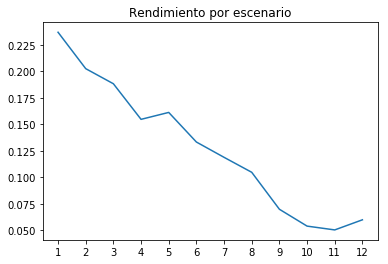

In [141]:
plt.plot(ren_fin_total)
plt.title("Rendimiento por escenario")
plt.show()

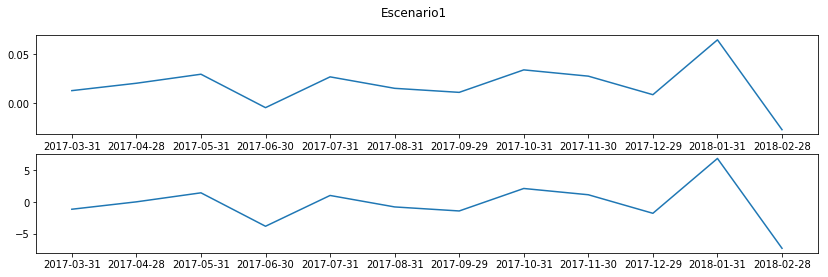

In [142]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario1')
plt.subplot(2, 1, 1)
plt.plot(rend1)

plt.subplot(2, 1, 2)
plt.plot(sharpe1)

plt.show()

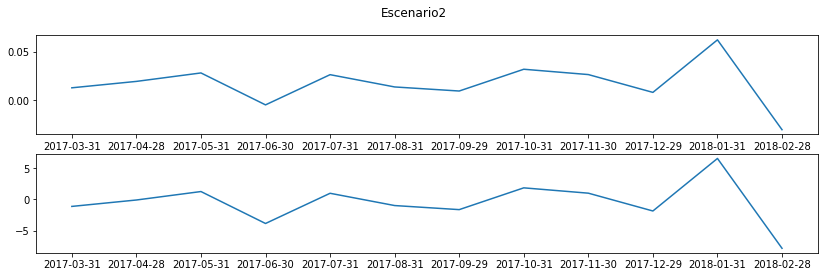

In [143]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario2')
plt.subplot(2, 1, 1)
plt.plot(rend2)
plt.subplot(2, 1, 2)
plt.plot(sharpe2)
plt.show()

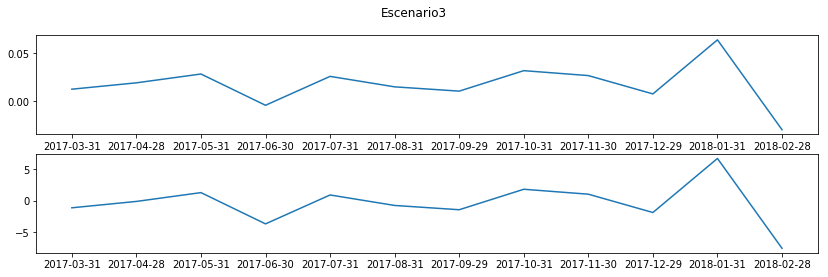

In [144]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario3')
plt.subplot(2, 1, 1)
plt.plot(rend3)
plt.subplot(2, 1, 2)
plt.plot(sharpe3)
plt.show()

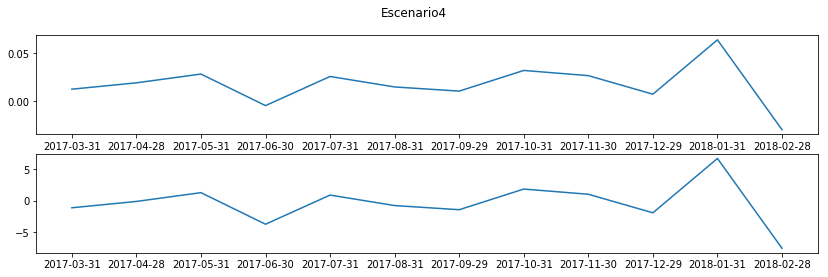

In [145]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario4')
plt.subplot(2, 1, 1)
plt.plot(rend4)
plt.subplot(2, 1, 2)
plt.plot(sharpe4)
plt.show()

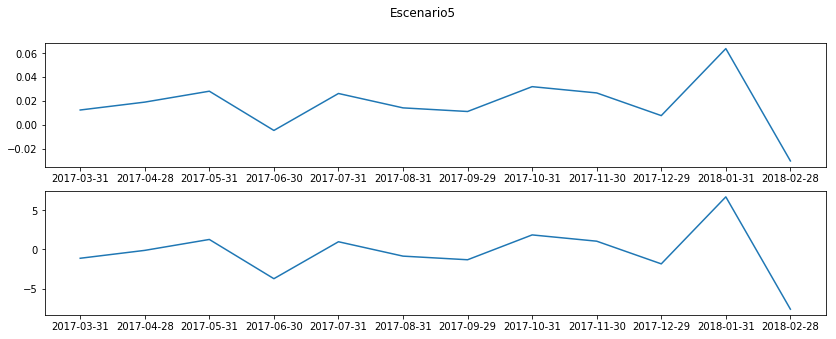

In [146]:
plt.figure(figsize=(14, 5))
plt.suptitle('Escenario5')
plt.subplot(2, 1, 1)
plt.plot(rend5)
plt.subplot(2, 1, 2)
plt.plot(sharpe5)
plt.show()

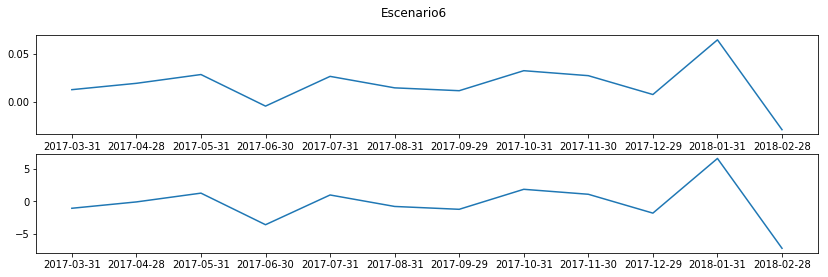

In [147]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario6')
plt.subplot(2, 1, 1)
plt.plot(rend6)
plt.subplot(2, 1, 2)
plt.plot(sharpe6)
plt.show()

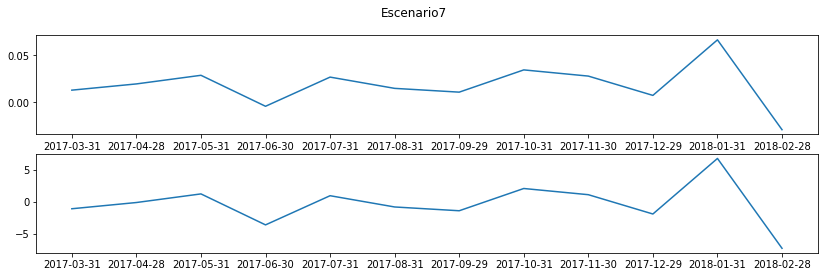

In [148]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario7')
plt.subplot(2, 1, 1)
plt.plot(rend7)
plt.subplot(2, 1, 2)
plt.plot(sharpe7)
plt.show()

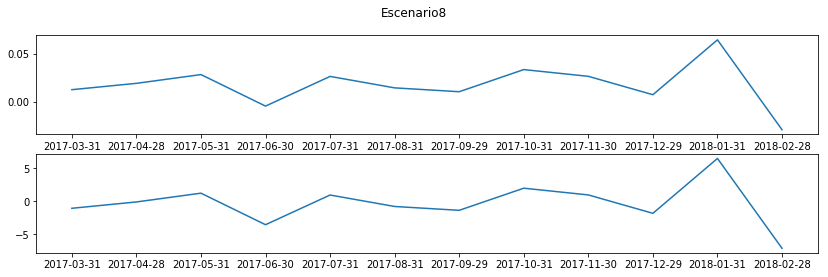

In [149]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario8')
plt.subplot(2, 1, 1)
plt.plot(rend8)
plt.subplot(2, 1, 2)
plt.plot(sharpe8)
plt.show()

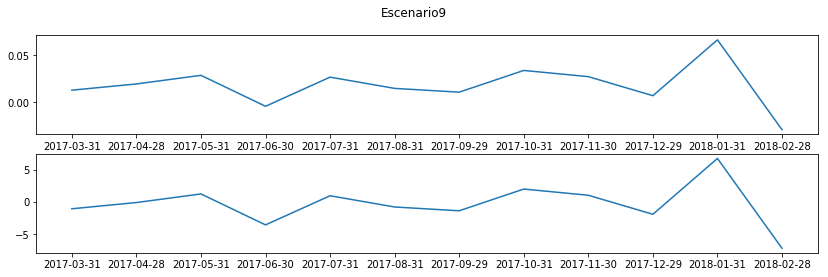

In [150]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario9')
plt.subplot(2, 1, 1)
plt.plot(rend9)
plt.subplot(2, 1, 2)
plt.plot(sharpe9)
plt.show()

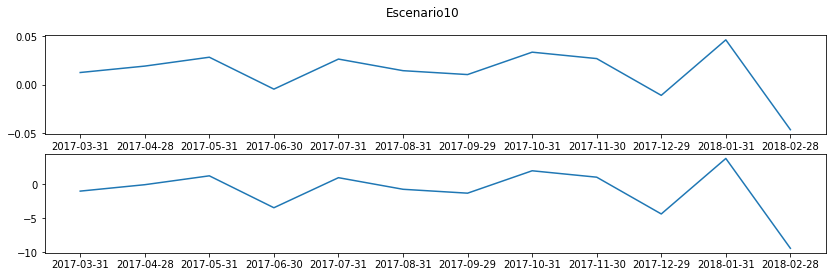

In [151]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario10')
plt.subplot(2, 1, 1)
plt.plot(rend10)
plt.subplot(2, 1, 2)
plt.plot(sharpe10)
plt.show()

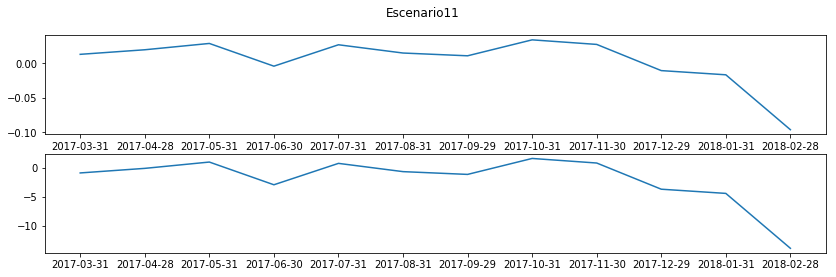

In [152]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario11')
plt.subplot(2, 1, 1)
plt.plot(rend11)
plt.subplot(2, 1, 2)
plt.plot(sharpe11)
plt.show()

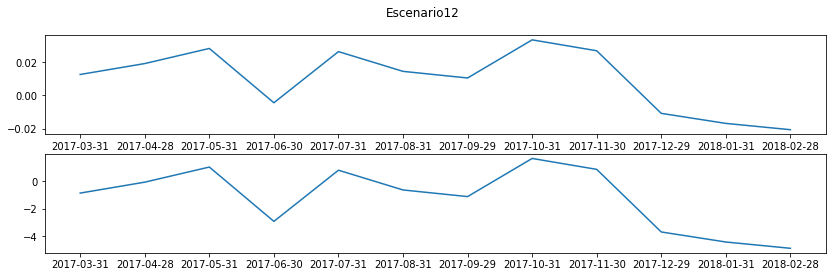

In [153]:
plt.figure(figsize=(14, 4))
plt.suptitle('Escenario12')
plt.subplot(2, 1, 1)
plt.plot(rend12)
plt.subplot(2, 1, 2)
plt.plot(sharpe12)
plt.show()